## Hawk-Dove game

This is a simple model of the Hawk-Dove game.

### background

The Hawk-dove game is a model of the evolution of social behavior in conflict situations. It is also important as a simple illustration of the principle of *frequency-dependent selection*: the success of a strategy depends on the proportion of individuals that play the strategy.

### mechanism

Each generation, agents are paired randomly to play a Hawk-Dove game with one another. Then they all reproduce as a function of the points they have won or lost during the game (more points = more offspring, on average) and they die.

Two parameters, $v$ and $c$, represent the value of food and the cost of injury. Each piece of food has value $2v$. The payoffs of the game are the following:

-If two Hawks meet each other, each gets $v-c$.

-If a Hawk meets a Dove, the Hawk gets $2v$ while the Dove gets $0$.

-If two Doves meet each other, they each get $v$.


### dynamics

Some simple math (see below) shows that the frequency of Hawks in the population will be about $v/c$. This means that as long as $v/c < 1$ (i.e. as long as the value of half a piece of food is lower than the expected cost of engaging in a fight), then the population will be a mix of Hawks and Doves. The more costly it is to be in a fight, the fewer Hawks there will be. 

Therefore, the game is a quintessential example of negative frequency-dependent selection.

### analytical model

Let $p$ be the proportion of Hawks in the population. Then the expected payoff to a Hawk is:
$$E(H) = (v-c)p + 2v(1-p)$$
and the expected payoff to a Dove is:
$$E(D) = 0p + v(1-p)$$

We look for the value of $p$ for which $E(H) = E(D)$. When this is the case, we have an equilibrium, since no strategy will increase or decrease in frequency. $E(H) = E(D)$ hold when:

$(v-c)p + 2v(1-p) = 0p + v(1-p)$

i.e. $p = v/c$.  

### things to try

You can modify the parameters below and see what happens.

In [1]:
#fitness benefit of getting half the resource
v = 2

#cost of fighting
c = 5

#population size
N = 100

#number of generations
g = 400

#mutation rate
mu = .001

#initial strategy ("D" for Dove, "H" for Hawk)
initial_strategy = "D"



### Import necessary libraries

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

### General parameters of the model

In [4]:
###The model parameters

#initial fitness
initial_fitness = 5

### Specific game parameters

In [5]:
#the strategy space
strategy_space = ["H", "D"]



### Define the "agent" class

In [6]:


class agent:
    def __init__(self, name, strategy, fitness):
        self.name = name
        self.strategy = strategy
        self.fitness = fitness
    
    def mutate(self):
        self.strategy=np.random.choice(strategy_space)
        
        
    def add_to_fitness(self, increment):
        self.fitness += increment

        
        

### Some key functions


In [7]:
def initialize():
    return[agent(i, initial_strategy, initial_fitness) for i in range(N)]
    

In [8]:
#the function to compute average frequency of a gene

def average_X(X):
    return len([i for i in pop if i.strategy == X])/N
    

In [9]:
#put agents into pairs and have them play a game

def games():
    
    #put the names of agents in an array and randomly shuffle that array
    arena = list(range(N))
    np.random.shuffle(arena)
    
    #select pairs and make them play the game
    for i in arena:
        if i % 2 == 0:
            HD(i, i+1)

In [10]:
#the Hawk-Dove game

def HD(player1, player2):
    player1_strat = pop[player1].strategy
    player2_strat = pop[player2].strategy
    
    if player1_strat == "H":
        if player2_strat == "D":
            pop[player1].add_to_fitness(2*v)
        if player2_strat == "H":
            pop[player1].add_to_fitness(v-c)
            pop[player2].add_to_fitness(v-c)
    if player1_strat == "D":
        if player2_strat == "D":
            pop[player1].add_to_fitness(v)
            pop[player2].add_to_fitness(v)
        if player2_strat == "H":
            pop[player1].add_to_fitness(0)
            pop[player2].add_to_fitness(2*v)            


In [11]:
#the selection function and its building blocks

#standardize fitness so that agents with lowest fitness have fitness 1
def standardization():
        min_fitness = min([i.fitness for i in pop])
        for i in range(N):
            pop[i].fitness += (1 - min_fitness)

#each agent gets to put its name in a hat w times, where w is its fitness
def lottery_prep():
    hat = []
    for i in range(N):
        for j in range(pop[i].fitness):
            hat.append(pop[i].name)
    return hat

#create the next generation by drawing the name of the parents from the hat
def reproduction(hat):
    temporary_pop=[]
    for i in range(N):
        name_drawn = np.random.choice(hat)
        strategy = pop[name_drawn].strategy
        temporary_pop.append(agent(i, strategy, initial_fitness))

    pop.clear()
    for i in range(N):
        pop.append(temporary_pop[i])



#the selection function

def selection():

    standardization()
    hat=lottery_prep()
    reproduction(hat)





In [12]:
#mutation function    
def mutation():
    for i in range(N):
        if (np.random.uniform() < mu):
            pop[i].mutate()

### Run the model and plot the dynamics

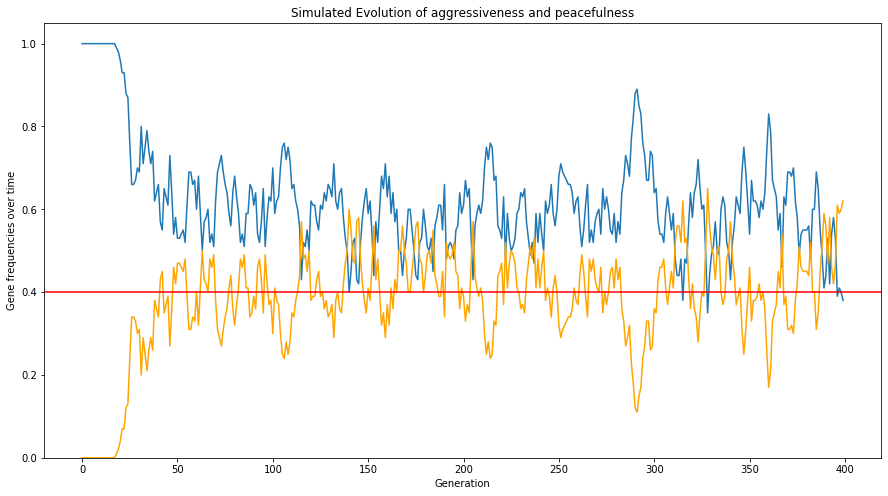

In [13]:
#these arrays record average gene frequencies across a run
Average_dove = []
Average_hawk = []



#initialize population            
pop=initialize()

#run the model for g generations
for i in range(g):
    games()
    selection()
    mutation()
    Average_dove.append(average_X("D"))
    Average_hawk.append(average_X("H"))

    
#plot results    
plt.figure( figsize=( 15, 8 ) )

plt.title('Simulated Evolution of aggressiveness and peacefulness')

plt.ylabel('Gene frequencies over time')
plt.xlabel('Generation')
plt.plot(Average_dove)
plt.plot(Average_hawk, color="Orange")
plt.ylim(0,1.05)
plt.axhline(y=v/c, color="red")


### Graph legend

Blue = frequency of doves

Orange = frequency of hawks

Red line = "theoretical" frequency of Hawks (given by $v/c$)